In [1]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("D:/CB/MZml/HepG2-Trypsin-GluC-HILIC-R3.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("D:/CB/MZml/HepG2-Trypsin-GluC-HILIC-R3.mzML","D:/CB/Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
# Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())

# PeptideHits
for Peptide in peptide_id.getHits():
    print(" - Peptide hit sequence:", Peptide.getSequence())
    mz = Peptide.getSequence().getMonoWeight(Residue.ResidueType.Full, Peptide.getCharge()) / Peptide.getCharge()
    print(" - Peptide hit monoisotopic m/z:", mz)
    score=mz/peptide_id.getMZ()
    print("comparsion score = ", score)
    a = str(Peptide.getSequence())
    tsg = TheoreticalSpectrumGenerator()
    spec1 = MSSpectrum()
    peptide = AASequence.fromString(a)
    p = Param()
    p.setValue("add_b_ion", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 2)
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    tsg1 = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    p = tsg1.getParameters()
    experiment_spectrum = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
    p.setValue("add_y_ions", "true")
    p.setValue("add_b_ions", "true")
    p.setValue("add_metainfo", "true")
    tsg1.setParameters(p)
    peptide = AASequence.fromString(a)
    tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)


Peptide ID m/z: 1001.734802246094
Peptide ID rt: 715.947431487
Peptide scan index: 2563
Peptide ID score type: hyperscore
Peptide ID m/z: 996.414001464844
Peptide ID rt: 790.286927967
Peptide scan index: 2833
Peptide ID score type: hyperscore
Peptide ID m/z: 1494.111938476563
Peptide ID rt: 837.848597391
Peptide scan index: 3020
Peptide ID score type: hyperscore
Peptide ID m/z: 1007.075012207031
Peptide ID rt: 1034.72491120002
Peptide scan index: 3739
Peptide ID score type: hyperscore
Peptide ID m/z: 1437.085571289063
Peptide ID rt: 1679.90942948802
Peptide scan index: 6028
Peptide ID score type: hyperscore
Peptide ID m/z: 1445.088623046875
Peptide ID rt: 1779.9051755839798
Peptide scan index: 6385
Peptide ID score type: hyperscore
Peptide ID m/z: 814.893981933594
Peptide ID rt: 2177.407454352
Peptide scan index: 7800
Peptide ID score type: hyperscore
Peptide ID m/z: 1445.089111328125
Peptide ID rt: 2845.96782953598
Peptide scan index: 10318
Peptide ID score type: hyperscore
Peptide ID

Number of matched peaks: 20
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
b2+	1	129.065854721971	129.10153198242188
b4++	2	152.068594753871	152.07106018066406
y2++	2	168.07843918267102	168.07791137695312
y1+	1	175.118952913371	175.1188201904297
b3+	1	216.09788388147098	216.0590057373047
b5++	2	216.589891865521	216.09832763671875
y3++	2	232.59973629432102	233.0870819091797
b6++	2	273.611355961221	274.0665283203125
y5++	2	353.66306558142094	353.1636657714844
b5+	1	432.17250726427096	432.1734313964844
y7++	2	454.7018651697209	455.1590576171875
b6+	1	546.215435455671	546.2045288085938
y10++	2	588.2810115046708	588.2557983398438
b8+	1	690.268928710871	690.2463989257812
y6+	1	837.3593397131709	837.329833984375
b22++	2	1075.9369599212212	1075.4859619140625
y20++	2	1149.482165422371	1149.490478515625
y10+	1	1175.5547465425707	1176.0225830078125
y23++	2	1278.530376145671	1278.54296875
y27++	2	1458.594434464671	1458.722412109375
AGSSENGSLSEDM

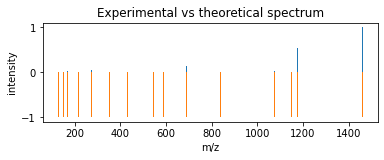

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    #plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = experiment_spectrum.get_peaks()

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)



alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
# use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
    # align both spectra
spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
print("Number of matched peaks: " + str(len(alignment)))
print("ions"+"      "+"theoretical. m/z"+"      "+"experimental m/z")
print(50*"-")


for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(experiment_spectrum[obs_idx].getMZ()))
b=str(peptide_id.getMetaValue("scan_index"))
print(a)

theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(experiment_spectrum[obs_idx].getMZ())
    obs_int.append(experiment_spectrum[obs_idx].getIntensity())
plt.subplot(2, 1, 1)
    # make range form 300 to 1000 to see the simialrity
title = 'Experimental vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)  
   

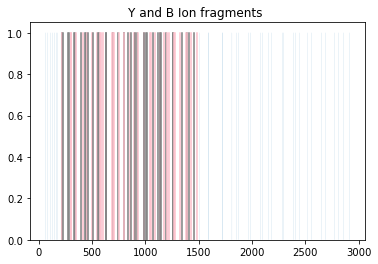

In [3]:
#y and b fragments
mz,i = spec1.get_peaks() 
plt.title("Y and B Ion fragments ")
count = 0
idx=0
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False)
for mz, i in zip(*theo_spectrum.get_peaks()):
    if mz >= 200 and mz <= 1500:
        if 'y' in theo_spectrum.getStringDataArrays()[0][count].decode():
          
            plt.plot([mz, mz], [0, i], snap=True, color="pink")

            count = count + 1
        else:
            plt.plot([mz, mz], [0, i], snap=True, color="gray")
                

            count = count + 1

plt.ylim(bottom=0)
plt.show()


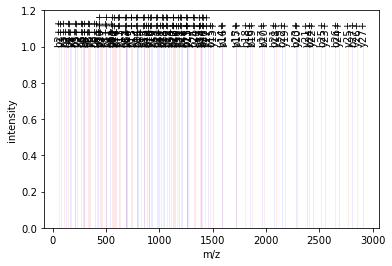

In [4]:
#can try another way
mz,i = spec1.get_peaks() 
annot = spec1.getStringDataArrays()[0] 
bars =plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False,color =("r","b"),)
count=0
for rect in bars: 
    height = rect.get_height() 
    if "y" in annot[count].decode():
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90, snap=True)
    else :
         plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90,snap=True) 
    idx += 1 
    count+=1
    plt.ylim(top=1.2) 
    plt.xlabel("m/z") 
    plt.ylabel("intensity")

In [5]:
#Proteolytic Digestion with Trypsin
dig = ProteaseDigestion()
dig.getEnzymeName()
entries=[]
f=FASTAFile()
f.load("D:/CB/Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta",entries)
c=0
while c<len(entries)-1:
    f=AASequence.fromString(entries[c].sequence)
    print("sequence: ",c)
    result = []
    dig.digest(f, result)
    c=c+1
peptides=[AASequence.fromString(s.toString()) for s in result]
for peptide in peptides:
    tsg=TheoreticalSpectrumGenerator()
    spec1=MSSpectrum()
    p=Param()
    p.setValue("add_y_ions","true")
    p.setValue("add_b_ions","true")
    p.setValue("add_metainfo","true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1,peptide,1,1)
    print("Spectrum 1 of",peptide,"has",spec1.size(),"peaks")
for ion,peak in zip(spec1.getStringDataArrays()[0],spec1):
    print(ion.decode(),"is generated at m/z",peak.getMZ())
  

sequence:  0
sequence:  1
sequence:  2
sequence:  3
sequence:  4
sequence:  5
sequence:  6
sequence:  7
sequence:  8
sequence:  9
sequence:  10
sequence:  11
sequence:  12
sequence:  13
sequence:  14
sequence:  15
sequence:  16
sequence:  17
sequence:  18
sequence:  19
sequence:  20
sequence:  21
sequence:  22
Spectrum 1 of AGSSESLAVGGYGER has 27 peaks
b2+ is generated at m/z 129.065854721971
y1+ is generated at m/z 175.118952913371
b3+ is generated at m/z 216.09788388147098
b4+ is generated at m/z 303.12991304097096
y2+ is generated at m/z 304.161547136671
y3+ is generated at m/z 361.18301123237103
b5+ is generated at m/z 432.17250726427096
b6+ is generated at m/z 519.204536423771
y4+ is generated at m/z 524.246340519471
y5+ is generated at m/z 581.267804615171
b7+ is generated at m/z 632.288600774671
y6+ is generated at m/z 638.289268710871
b8+ is generated at m/z 703.325714934171
y7+ is generated at m/z 737.3576829979711
b9+ is generated at m/z 802.394129221271
y8+ is generated at m

In [ ]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("D:/CB/MZml/HepG2-Trypsin-GluC-HILIC-R3.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("D:/CB/MZml/HepG2-Trypsin-GluC-HILIC-R3.mzML","D:/CB/Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
  # Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())

  #Show all Data in peptides
    for hit in peptide_id.getHits():
        print(" - Peptide hit sequence:", hit.getSequence())
        mz = hit.getSequence().getMonoWeight(Residue.ResidueType.Full, hit.getCharge()) / hit.getCharge()
        print(" - Peptide hit monoisotopic m/z:", mz)
        score=mz/peptide_id.getMZ()
        print("comparsion score = ", score)
        a = str(hit.getSequence())
        tsg = TheoreticalSpectrumGenerator()
        spec1 = MSSpectrum()
        peptide = AASequence.fromString(a)
        p = Param()
        p.setValue("add_b_ion", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(spec1, peptide, 1, 2)
        tsg1 = TheoreticalSpectrumGenerator()
        theo_spectrum = MSSpectrum()
        p = tsg1.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        tsg1.setParameters(p)
        peptide = AASequence.fromString(a)
        tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)
        print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
